In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib as plt
import bar_chart_race

In [284]:
wind = gpd.read_file('../data/USWTDB/uswtdb_v3_2_20201014.geojson')

In [285]:
wind.p_year.value_counts()

2012.0    6772
2009.0    5700
2008.0    5047
2015.0    4301
2016.0    3799
2019.0    3792
2020.0    3716
2011.0    3496
2007.0    3200
2018.0    3141
2017.0    3044
2010.0    2965
2014.0    2506
2001.0    1875
2005.0    1658
2006.0    1507
2003.0    1152
1982.0     937
1999.0     907
1985.0     714
2013.0     603
2002.0     461
1983.0     433
2004.0     328
1990.0     327
1989.0     288
1988.0     277
1997.0     231
1987.0     213
1998.0     186
1984.0     155
1986.0     151
2000.0      72
1995.0      43
1994.0      30
1996.0      14
1981.0      11
1992.0       2
1991.0       1
Name: p_year, dtype: int64

In [314]:
turbine_count_year = wind.groupby(['t_manu', 'p_year']).case_id.count()
turbine_count_year

t_manu     p_year
AAER       2009.0      2
           2010.0      1
AOC        1997.0      1
           1999.0      5
           2000.0      2
                    ... 
Windmatic  1995.0      1
           2012.0      5
Zond       1997.0     12
           1998.0      3
           1999.0    209
Name: case_id, Length: 296, dtype: int64

In [315]:
turbine_count_year = turbine_count_year.to_frame()
turbine_count_year_tr = turbine_count_year.transpose()

In [318]:
turbine_count_year2 = turbine_count_year.cumsum()

In [321]:
turbine_count_year2 = turbine_count_year2.reset_index()

In [324]:
#turbine_count_year2.to_csv('new_manu_chart.csv')

In [329]:
turbine_count_year2

,t_manu,p_year,case_id
0,AAER,2009.0,2
1,AAER,2010.0,3
2,AOC,1997.0,4
3,AOC,1999.0,9
4,AOC,2000.0,11
...,...,...,...
291,Windmatic,1995.0,59269
292,Windmatic,2012.0,59274
293,Zond,1997.0,59286
294,Zond,1998.0,59289


In [245]:
turbine_count_year['idx'] = turbine_count_year.groupby('p_year').cumcount()+1 

In [246]:
turbine_count_year_chart = turbine_count_year.pivot(index='p_year',columns='t_manu', values=['case_id'])

In [247]:
turbine_count_year_chart = turbine_count_year_chart.sort_index(axis=1, level=1)
turbine_count_year_chart.columns = [f'{y}' for x,y in turbine_count_year_chart.columns]
turbine_count_year_chart = turbine_count_year_chart.reset_index()
turbine_count_year_chart = turbine_count_year_chart.set_index(['p_year'])

In [274]:
#turbine_count_year_chart.to_csv('manufacturers_by_year.csv')

In [231]:
#turbine_count_year_chart = turbine_count_year_chart.replace(np.nan, 0)

In [249]:
s = turbine_count_year_chart.loc[2005.0]
s 

AAER                    NaN
AOC                     NaN
AWE                     NaN
Acciona                 NaN
Aeronautica             NaN
                         ..
Wincon                  NaN
Wind Energy Solutions   NaN
Wind World              NaN
Windmatic               NaN
Zond                    NaN
Name: 2005.0, Length: 66, dtype: float64

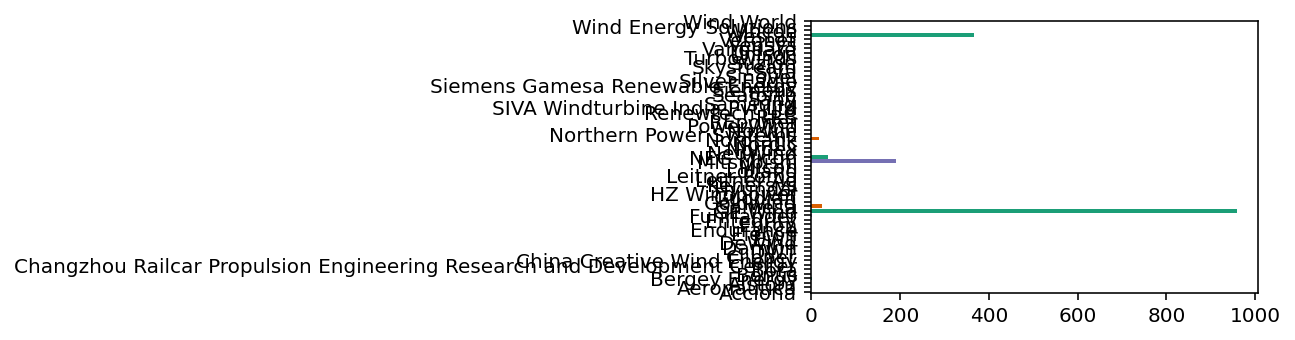

In [250]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4, 2.5), dpi=144)
colors = plt.cm.Dark2(range(3))
y = s.index
width = s.values
ax.barh(y=y, width=width, color=colors);

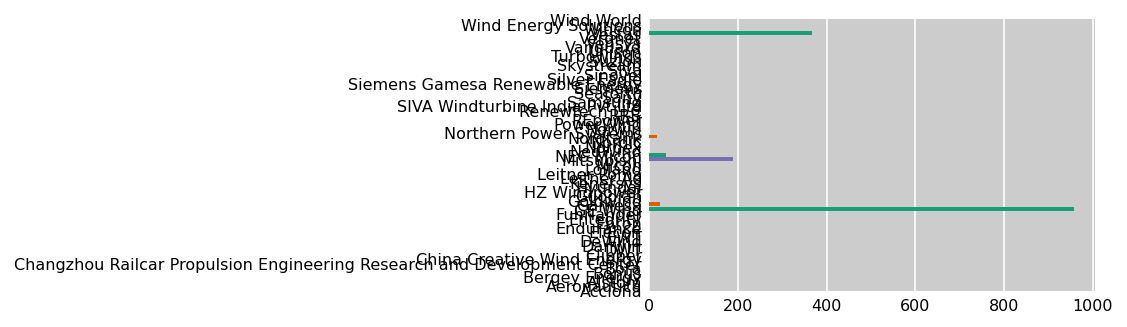

In [251]:
def nice_axes(ax):
    ax.set_facecolor('.8')
    ax.tick_params(labelsize=8, length=0)
    ax.grid(True, axis='x', color='white')
    ax.set_axisbelow(True)
    [spine.set_visible(False) for spine in ax.spines.values()]
    
nice_axes(ax)
fig

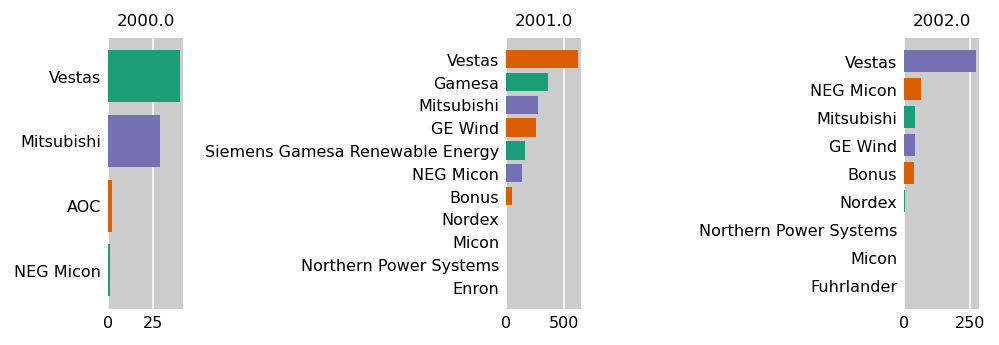

In [254]:
fig, ax_array = plt.subplots(nrows=1, ncols=3, figsize=(7, 2.5), 
                             dpi=144, tight_layout=True)
dates = [2000.0, 2001.0, 2002.0]
for ax, date in zip(ax_array, dates):
    s = turbine_count_year_chart.loc[date].sort_values()
    ax.barh(y=s.index, width=s.values, color=colors)
    ax.set_title(date, fontsize='smaller')
    nice_axes(ax)

In [241]:
turbine_count_year_chart.loc[2005.0].rank(method='first')

AAER                      1.0
AOC                       2.0
AWE                       3.0
Acciona                   4.0
Aeronautica               5.0
                         ... 
Wincon                   54.0
Wind Energy Solutions    55.0
Wind World               56.0
Windmatic                57.0
Zond                     58.0
Name: 2005.0, Length: 66, dtype: float64

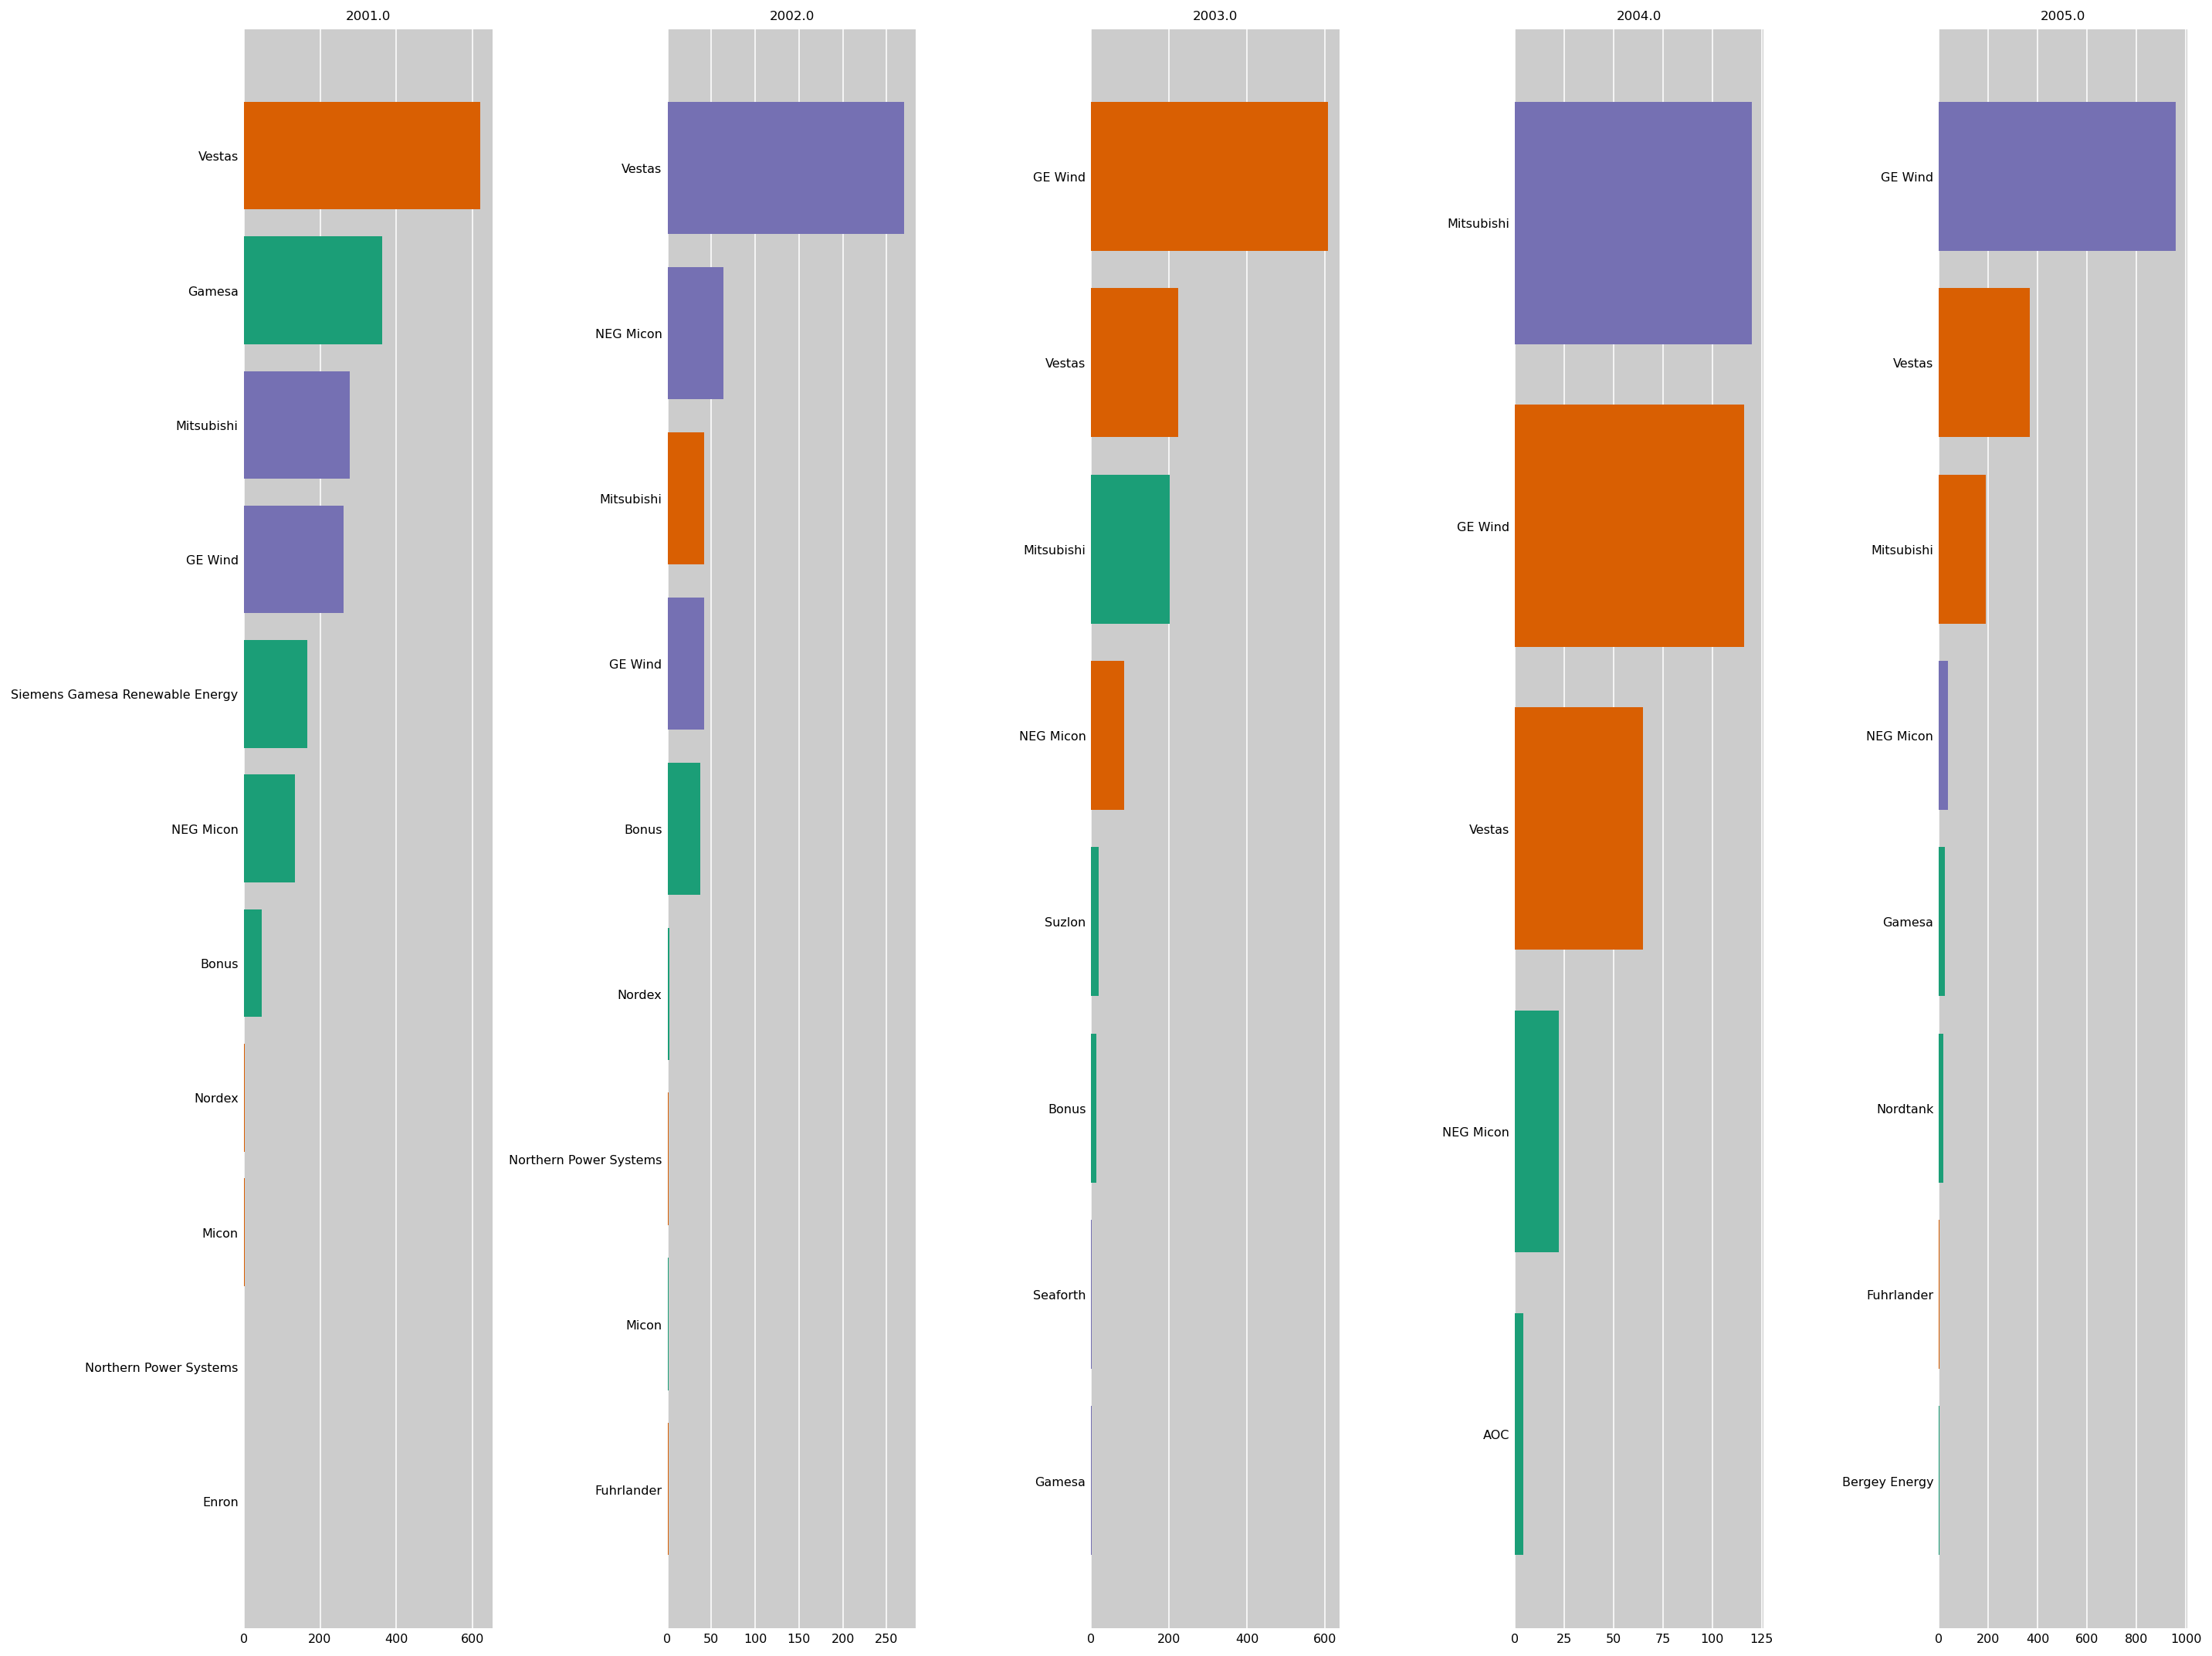

In [260]:
fig, ax_array = plt.subplots(nrows=1, ncols=5, figsize=(20, 15), 
                             dpi=144, tight_layout=True)
dates = [2001.0, 2002.0, 2003.0, 2004.0, 2005.0]
for ax, date in zip(ax_array, dates):
    s = turbine_count_year_chart.loc[date].dropna()
    y = turbine_count_year_chart.loc[date].dropna().rank(method='first')
    ax.barh(y=y, width=s.values, color=colors, tick_label=s.index)
    ax.set_title(date, fontsize='smaller')
    nice_axes(ax)

In [290]:
df2 = turbine_count_year_chart.loc[2001.0:2010.0]
df2 = df2.reset_index()
df2

,p_year,AAER,AOC,AWE,Acciona,Aeronautica,Alstom,Bergey Energy,Bonus,Bora,...,Unison,Vanguard,Vensys,Vergnet,Vestas,Wincon,Wind Energy Solutions,Wind World,Windmatic,Zond
0,2001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,NaN,...,NaN,NaN,NaN,NaN,620.0,NaN,NaN,NaN,NaN,NaN
1,2002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,NaN,...,NaN,NaN,NaN,NaN,270.0,NaN,NaN,NaN,NaN,NaN
2,2003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,...,NaN,NaN,NaN,NaN,224.0,NaN,NaN,NaN,NaN,NaN
3,2004.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,65.0,NaN,NaN,NaN,NaN,NaN
4,2005.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,367.0,NaN,NaN,NaN,NaN,NaN
5,2006.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,285.0,NaN,NaN,NaN,NaN,NaN
6,2007.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,536.0,NaN,NaN,NaN,NaN,NaN
7,2008.0,NaN,NaN,2.0,273.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,582.0,NaN,NaN,NaN,NaN,NaN
8,2009.0,2.0,NaN,NaN,136.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,825.0,NaN,1.0,NaN,NaN,NaN
9,2010.0,1.0,NaN,NaN,66.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,NaN,NaN


In [263]:
df2.index = df2.index * 5
df2

,p_year,AAER,AOC,AWE,Acciona,Aeronautica,Alstom,Bergey Energy,Bonus,Bora,...,Unison,Vanguard,Vensys,Vergnet,Vestas,Wincon,Wind Energy Solutions,Wind World,Windmatic,Zond
0,2001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,NaN,...,NaN,NaN,NaN,NaN,620.0,NaN,NaN,NaN,NaN,NaN
5,2002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,NaN,...,NaN,NaN,NaN,NaN,270.0,NaN,NaN,NaN,NaN,NaN
10,2003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,...,NaN,NaN,NaN,NaN,224.0,NaN,NaN,NaN,NaN,NaN
15,2004.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,65.0,NaN,NaN,NaN,NaN,NaN
20,2005.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,367.0,NaN,NaN,NaN,NaN,NaN
25,2006.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,285.0,NaN,NaN,NaN,NaN,NaN
30,2007.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,536.0,NaN,NaN,NaN,NaN,NaN
35,2008.0,NaN,NaN,2.0,273.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,582.0,NaN,NaN,NaN,NaN,NaN
40,2009.0,2.0,NaN,NaN,136.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,825.0,NaN,1.0,NaN,NaN,NaN
45,2010.0,1.0,NaN,NaN,66.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,NaN,NaN


In [264]:
last_idx = df2.index[-1] + 1
df_expanded = df2.reindex(range(last_idx))
df_expanded

,p_year,AAER,AOC,AWE,Acciona,Aeronautica,Alstom,Bergey Energy,Bonus,Bora,...,Unison,Vanguard,Vensys,Vergnet,Vestas,Wincon,Wind Energy Solutions,Wind World,Windmatic,Zond
0,2001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,NaN,...,NaN,NaN,NaN,NaN,620.0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,NaN,...,NaN,NaN,NaN,NaN,270.0,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [265]:
df_expanded['p_year'] = df_expanded['p_year'].fillna(method='ffill')
df_expanded = df_expanded.set_index('p_year')
df_expanded

,AAER,AOC,AWE,Acciona,Aeronautica,Alstom,Bergey Energy,Bonus,Bora,Changzhou Railcar Propulsion Engineering Research and Development Center,...,Unison,Vanguard,Vensys,Vergnet,Vestas,Wincon,Wind Energy Solutions,Wind World,Windmatic,Zond
p_year,,,,,,,,,,,,,,,,,,,,,
2001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,NaN,NaN,...,NaN,NaN,NaN,NaN,620.0,NaN,NaN,NaN,NaN,NaN
2001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,NaN,NaN,...,NaN,NaN,NaN,NaN,270.0,NaN,NaN,NaN,NaN,NaN
2002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [266]:
df_rank_expanded = df_expanded.rank(axis=1, method='first')
df_rank_expanded

,AAER,AOC,AWE,Acciona,Aeronautica,Alstom,Bergey Energy,Bonus,Bora,Changzhou Railcar Propulsion Engineering Research and Development Center,...,Unison,Vanguard,Vensys,Vergnet,Vestas,Wincon,Wind Energy Solutions,Wind World,Windmatic,Zond
p_year,,,,,,,,,,,,,,,,,,,,,
2001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN
2001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN
2002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [267]:
df_expanded = df_expanded.interpolate()
df_expanded

,AAER,AOC,AWE,Acciona,Aeronautica,Alstom,Bergey Energy,Bonus,Bora,Changzhou Railcar Propulsion Engineering Research and Development Center,...,Unison,Vanguard,Vensys,Vergnet,Vestas,Wincon,Wind Energy Solutions,Wind World,Windmatic,Zond
p_year,,,,,,,,,,,,,,,,,,,,,
2001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,620.0,NaN,NaN,NaN,NaN,NaN
2001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.800000,NaN,NaN,...,NaN,NaN,NaN,NaN,550.0,NaN,NaN,NaN,NaN,NaN
2001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.600000,NaN,NaN,...,NaN,NaN,NaN,NaN,480.0,NaN,NaN,NaN,NaN,NaN
2001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.400000,NaN,NaN,...,NaN,NaN,NaN,NaN,410.0,NaN,NaN,NaN,NaN,NaN
2001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.200000,NaN,NaN,...,NaN,NaN,NaN,NaN,340.0,NaN,NaN,NaN,NaN,NaN
2002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,270.0,NaN,NaN,NaN,NaN,NaN
2002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,260.8,NaN,NaN,NaN,NaN,NaN
2002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,251.6,NaN,NaN,NaN,NaN,NaN
2002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,242.4,NaN,NaN,NaN,NaN,NaN


ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (66,) and requested shape (11,)

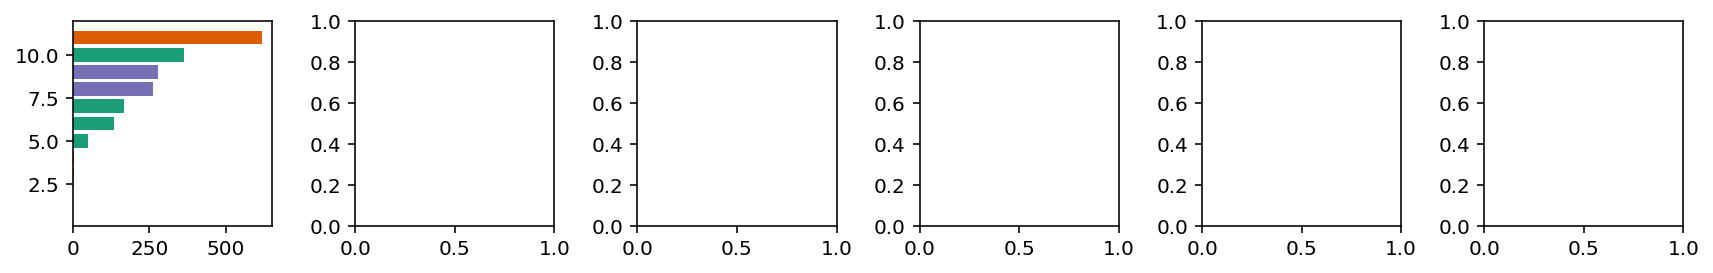

In [273]:
fig, ax_array = plt.subplots(nrows=1, ncols=6, figsize=(12, 2), 
                             dpi=144, tight_layout=True)
labels = df_expanded.columns
for i, ax in enumerate(ax_array.flatten()):
    y = df_rank_expanded.iloc[i].dropna()
    width = df_expanded.iloc[i].dropna()
    ax.barh(y=y, width=width, color=colors, tick_label=labels)
    nice_axes(ax)
ax_array[0].set_title('2001')
ax_array[-1].set_title('2002');

In [336]:
manu_chart_race = turbine_count_year_chart.replace(np.nan, 0).cumsum()

In [365]:
manu_chart_race

,AAER,AOC,AWE,Acciona,Aeronautica,Alstom,Bergey Energy,Bonus,Bora,Changzhou Railcar Propulsion Engineering Research and Development Center,...,Unison,Vanguard,Vensys,Vergnet,Vestas,Wincon,Wind Energy Solutions,Wind World,Windmatic,Zond
p_year,,,,,,,,,,,,,,,,,,,,,
1982.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1983.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,433.0,0.0,0.0,0.0,0.0,0.0
1984.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,...,0.0,0.0,0.0,0.0,433.0,0.0,0.0,0.0,0.0,0.0
1985.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,152.0,0.0,0.0,...,0.0,3.0,0.0,0.0,516.0,0.0,0.0,0.0,49.0,0.0
1986.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,0.0,...,0.0,3.0,0.0,0.0,518.0,0.0,0.0,0.0,49.0,0.0
1987.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,0.0,...,0.0,3.0,0.0,0.0,532.0,0.0,0.0,0.0,49.0,0.0
1988.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,0.0,...,0.0,3.0,0.0,0.0,532.0,1.0,0.0,0.0,49.0,0.0
1990.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,0.0,...,0.0,3.0,0.0,0.0,858.0,1.0,0.0,0.0,49.0,0.0
1991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,0.0,...,0.0,3.0,0.0,0.0,859.0,1.0,0.0,0.0,49.0,0.0


In [301]:
#manu_chart_race.to_csv('manu_chart_race.csv')

In [343]:
please_work = manu_chart_race.stack().to_frame().reset_index()

In [353]:
please_work['p_year'] = please_work.p_year.astype(int)

In [355]:
please_work.columns = ['p_year', 'manu', 'total_turbines']

In [358]:
please_work['total_turbines'] = please_work.total_turbines.astype(int)

In [361]:
please_work.tail(60)

,p_year,manu,total_turbines
2382,2020,Bergey Energy,1
2383,2020,Bonus,305
2384,2020,Bora,2
2385,2020,Changzhou Railcar Propulsion Engineering Resea...,1
2386,2020,China Creative Wind Energy,17
2387,2020,Clipper,681
2388,2020,DWT,1
2389,2020,Danwin,115
2390,2020,DeWind,84
2391,2020,EWT,13


In [360]:
#please_work.to_csv('new_manu_please_work.csv')

In [364]:
please_work.sort_values(by=['p_year', 'total_turbines'], ascending=False).head(10)

,p_year,manu,total_turbines
2397,2020,GE Wind,25858
2436,2020,Vestas,13904
2424,2020,Siemens,5144
2398,2020,Gamesa,3076
2408,2020,Mitsubishi,2791
2430,2020,Suzlon,1316
2425,2020,Siemens Gamesa Renewable Energy,1146
2411,2020,Nordex,1145
2379,2020,Acciona,758
2387,2020,Clipper,681
